In [1]:
import pickle

from IPython.display import display
from PIL import Image
import torch

from diffusion_inpaint import Diffusion, create_alpha_schedule

In [2]:
with open('cifar10.pkl', 'rb') as f:
    full_model = pickle.load(f)

In [3]:
def display_samples(batch):
    img = batch.clamp(-1, 1).permute(2, 0, 3, 1).reshape([batch.shape[-2], -1, 3])
    arr = ((img.detach().numpy()+1)*127.5).astype('uint8')
    display(Image.fromarray(arr))

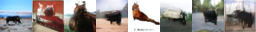

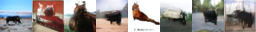

In [7]:
label = torch.zeros(8, 10)
label[:, 8] = 0

sample = full_model['G'](torch.randn(label.shape[0], 512), label, force_fp32=True)
display_samples(sample)

inpaint_me = sample.clone()
display_samples(inpaint_me)

In [8]:
diffusion = Diffusion(create_alpha_schedule(num_steps=50))

In [9]:
def cond_generator(latent):
    return full_model['G'](latent, label, force_fp32=True)
mask = torch.ones_like(inpaint_me)
mask[:, :, 16:] = 0
inpainted = diffusion.ddpm_sample_inpaint(
    x_T=torch.randn(inpaint_me.shape[0], 512),
    decoder_fn=cond_generator,
    target=inpaint_me,
    mask=mask,
)
display_samples(cond_generator(inpainted))

  2%|▎         | 1/40 [00:06<04:30,  6.93s/it]tensor([[-0., 0., -0.,  ..., 0., -0., 0.],
        [0., -0., 0.,  ..., -0., 0., -0.],
        [0., -0., -0.,  ..., -0., -0., 0.],
        ...,
        [-0., 0., -0.,  ..., -0., -0., 0.],
        [-0., -0., 0.,  ..., 0., -0., -0.],
        [-0., -0., 0.,  ..., -0., -0., -0.]])
  5%|▌         | 2/40 [00:13<04:14,  6.69s/it]tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
  5%|▌         | 2/40 [00:20<06:31, 10.31s/it]


KeyboardInterrupt: 